In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [3]:
# .shape -> 維度
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


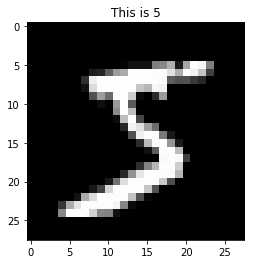

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("This is " + str(y_train[0]))
plt.imshow(x_train[0], cmap="gray")

In [5]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# 全連接層: Fully-Connected (Dense)
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# 784 * 256(Dense) + 256(bias)
model.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10(Dense) + 10(bias)
model.add(Dense(10, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 預處理資料(題目)
# 1. MLP輸入: 1D
# 2. 配合框架隨機W: 所有輸入要normalize(-1~1) (0~1)
x_train_reshape = x_train.reshape(-1, 784) / 255
x_test_reshape = x_test.reshape(-1, 784) / 255

In [18]:
x_train_reshape.shape

(60000, 784)

In [19]:
# 預處理資料(答案)
# 十個機率: 0 -> [1, 0, 0, 0, ...]
#          1 -> [0, 1, 0, 0, ...]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [20]:
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
# compile: 確定模型的訓練方式
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [22]:
# fit: 訓練模型
# batch_size: 看多少筆再做梯度的調整
# 1->每看一筆就調整weights:缺點:亂走
# 60000->看完全部再調整一次:缺點:花時間
# 建議數: 100~200筆平均調整一次weights
# validation_split(train_test_split): 重要!!! 
# (沒看過的資料)檢查模型什麼時候最好! 最好的時候停止訓練
# epochs: 整份訓練要看幾輪
# 當你的validation表現最好的時候, 就停下來
# validation + epochs -> 擬合程度
# verbose: log多寡
# 10 epochs+200 batch+0.1 split
# 54000 * 10 / 200 = 270(梯度更新)
model.fit(x_train_reshape, y_train_cat,
          batch_size=200,
          validation_split=0.1,
          epochs=15,
          verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 2s - loss: 0.3767 - acc: 0.8959 - val_loss: 0.1650 - val_acc: 0.9555
Epoch 2/15
 - 1s - loss: 0.1634 - acc: 0.9535 - val_loss: 0.1139 - val_acc: 0.9697
Epoch 3/15
 - 1s - loss: 0.1123 - acc: 0.9686 - val_loss: 0.0970 - val_acc: 0.9720
Epoch 4/15
 - 1s - loss: 0.0846 - acc: 0.9762 - val_loss: 0.0846 - val_acc: 0.9772
Epoch 5/15
 - 1s - loss: 0.0681 - acc: 0.9807 - val_loss: 0.0795 - val_acc: 0.9777
Epoch 6/15
 - 1s - loss: 0.0537 - acc: 0.9850 - val_loss: 0.0756 - val_acc: 0.9777
Epoch 7/15
 - 2s - loss: 0.0442 - acc: 0.9881 - val_loss: 0.0688 - val_acc: 0.9812
Epoch 8/15
 - 1s - loss: 0.0362 - acc: 0.9904 - val_loss: 0.0718 - val_acc: 0.9797
Epoch 9/15
 - 1s - loss: 0.0302 - acc: 0.9922 - val_loss: 0.0663 - val_acc: 0.9802
Epoch 10/15
 - 2s - loss: 0.0245 - acc: 0.9943 - val_loss: 0.0653 - val_acc: 0.9802
Epoch 11/15
 - 1s - loss: 0.0202 - acc: 0.9952 - val_loss: 0.0652 - val_acc: 0.9805
Epoch 12/15
 - 1s - loss: 0.0170 - a

In [24]:
# 衡量模型1
model.evaluate(x_test_reshape, y_test_cat)

10000/10000 [==============================] - 0s 41us/step


[0.06559432871503523, 0.9807]

In [27]:
# 預測 (X) predict: 機率 (O) predict_classes: 答案
pre = model.predict_classes(x_test_reshape)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [30]:
# 衡量模型2
from sklearn.metrics import confusion_matrix
i = ["{} (正確)".format(i) for i in range(10)]
c = ["{} (預測)".format(i) for i in range(10)]
pd.DataFrame(confusion_matrix(y_test, pre),
             index=i,
             columns=c)

,0 (預測),1 (預測),2 (預測),3 (預測),4 (預測),5 (預測),6 (預測),7 (預測),8 (預測),9 (預測)
0 (正確),971,0,2,1,1,0,1,1,3,0
1 (正確),0,1125,3,1,0,1,2,1,2,0
2 (正確),2,3,1010,0,3,0,2,8,4,0
3 (正確),0,0,1,990,0,5,0,5,5,4
4 (正確),2,0,2,1,956,0,4,5,1,11
5 (正確),2,0,0,4,1,876,3,2,3,1
6 (正確),4,2,3,1,7,8,932,1,0,0
7 (正確),0,3,5,2,1,0,0,1012,0,5
8 (正確),2,1,2,6,3,5,1,4,946,4
9 (正確),1,5,0,4,2,4,1,3,0,989


預測錯誤: 193


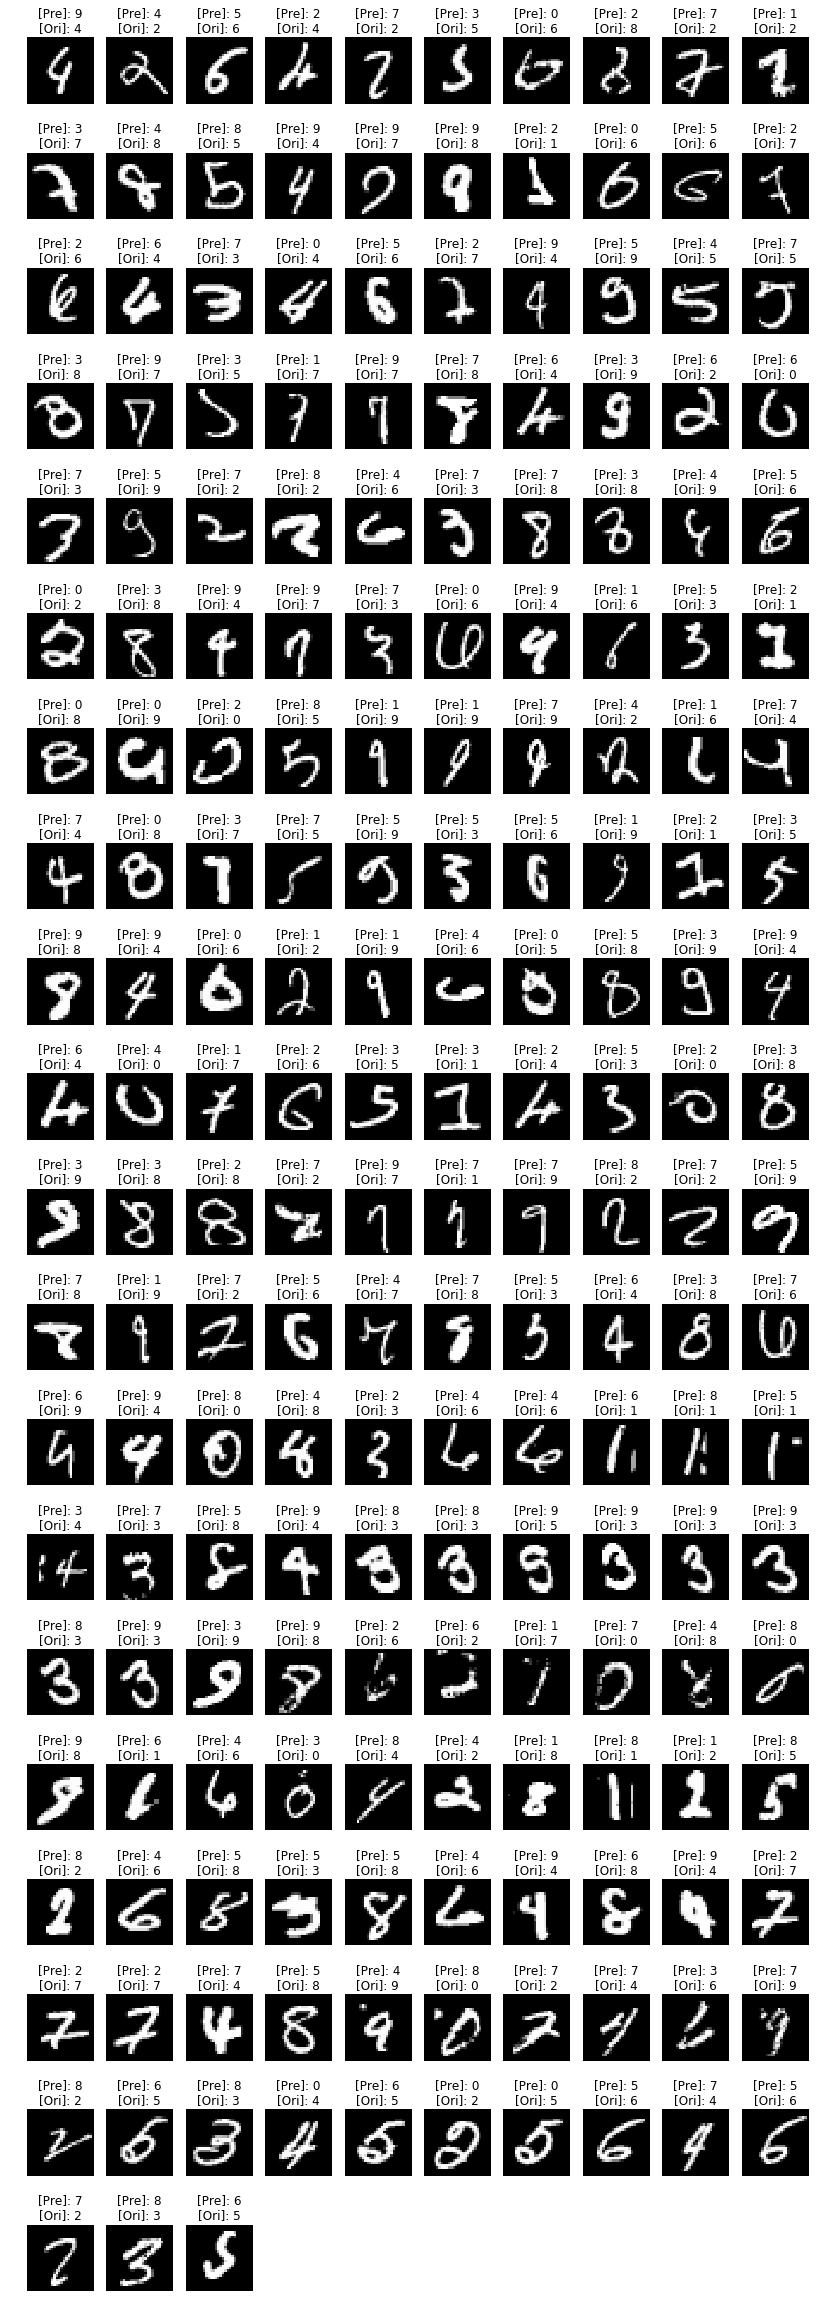

In [43]:
import numpy as np
# nonzero: (1st索引, 2nd索引, 3rd索引...)
idx = np.nonzero(pre != y_test)[0]
print("預測錯誤:", len(idx))
pre_false_img = x_test[idx]
pre_false_label = y_test[idx]
pre_false_predict = pre[idx]

width = 10
height = len(idx) // width + 1

plt.figure(figsize=(14, 42))
for i, img in enumerate(pre_false_img):
    plt.subplot(height, width, i+1)
    t = "[Pre]: {}\n[Ori]: {}".format(pre_false_predict[i],
                                      pre_false_label[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [44]:
model.save("mlp.h5")

In [45]:
from keras.models import load_model
loaded = load_model("mlp.h5")
# 再訓練(不需compile): fit
# 預測: predict/predict_classes
loaded.evaluate(x_test_reshape, y_test_cat)

10000/10000 [==============================] - 0s 41us/step


[0.06559432871503523, 0.9807]